In [1]:
#.. ... .... .. .....

In [2]:
# import dependencies
import optuna

from snorkel.labeling import labeling_function

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from snorkel.labeling import PandasLFApplier, LFAnalysis
from snorkel.labeling import labeling_function
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import f1_score as F1
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from snorkel.labeling import labeling_function
from snorkel.labeling.model import LabelModel

import pickle
import os

import optuna

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
clear_output()

In [5]:
# reading the labelled and unlabelled dataset into the workspace

labelled   = pd.read_csv('//Users//matt//Desktop//comp6721//Project//labelled_arxiv.csv',
                      low_memory=False)

unlabelled = pd.read_csv('//Users//matt//Desktop//comp6721//Project//unlabelled_arxiv.csv',
                        low_memory=False)




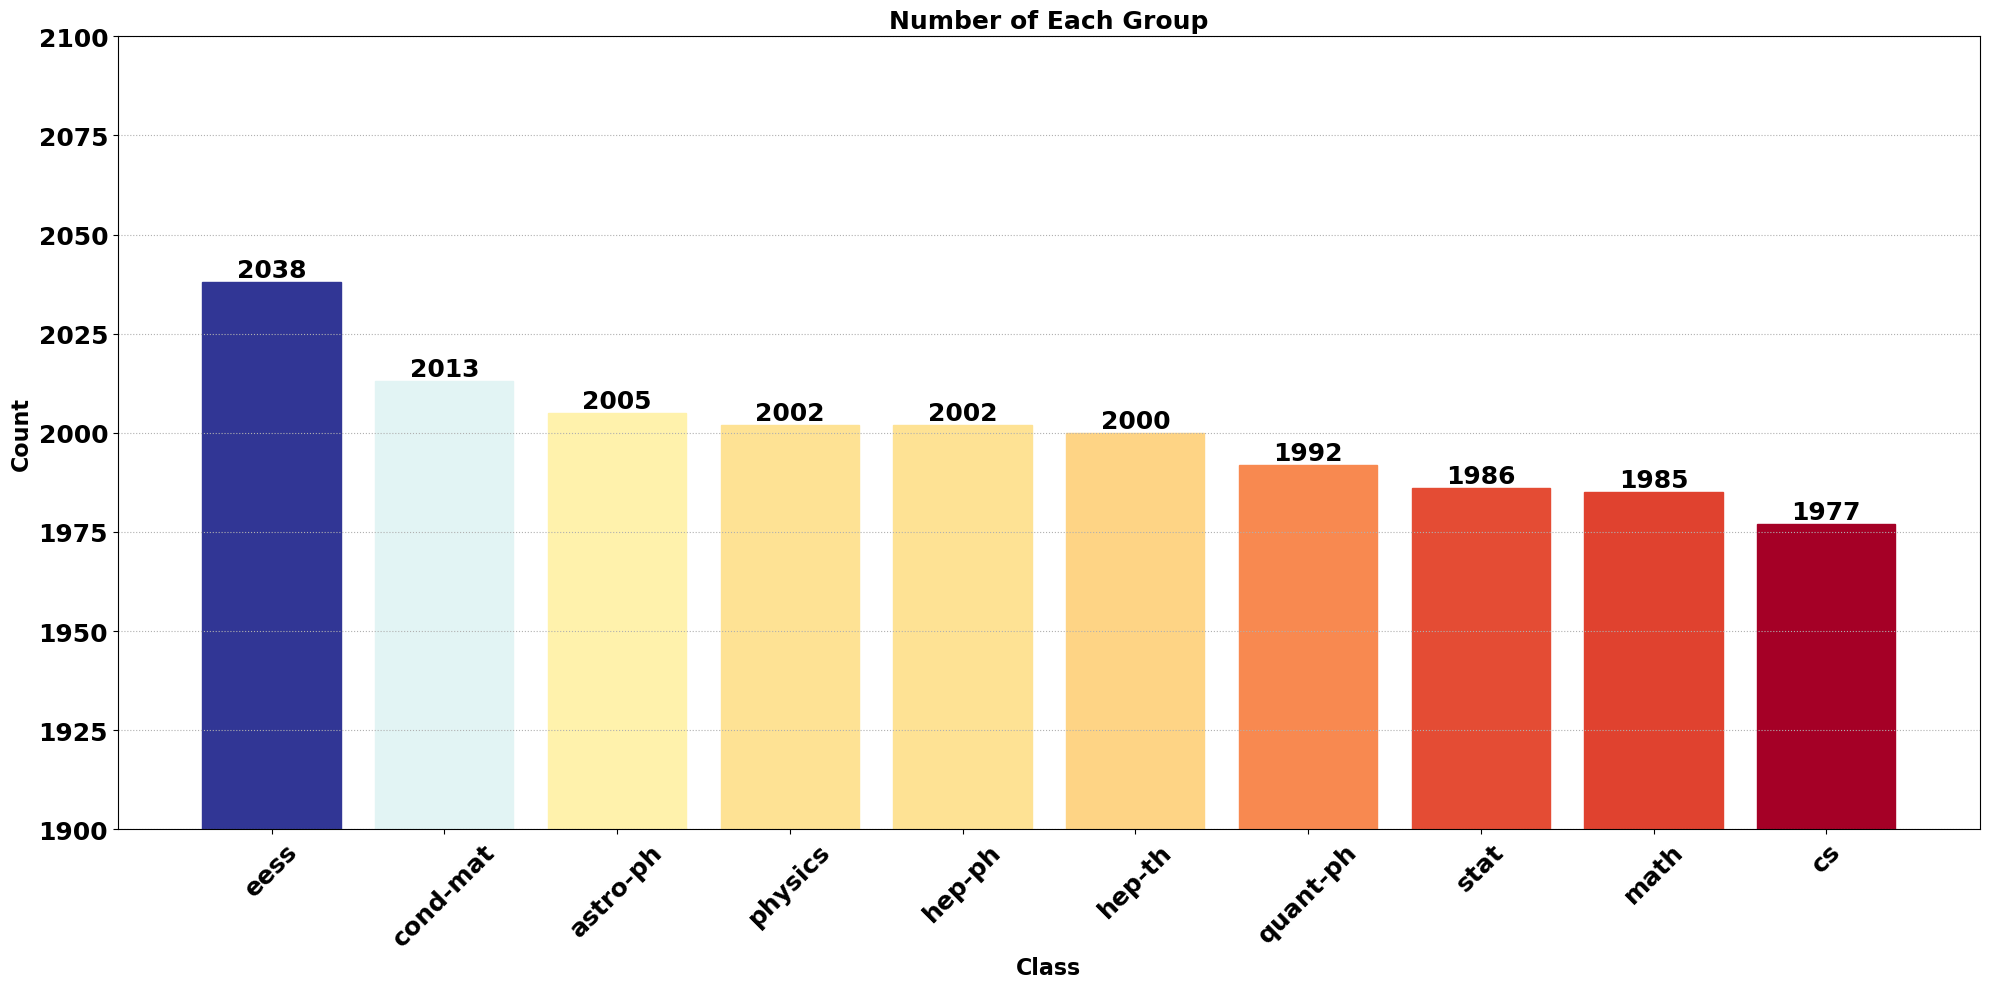

In [6]:
array = ['physics', 'quant-ph', 'cond-mat', 'stat', 'math', 'hep-th', 'cs', 'hep-ph', 'astro-ph', 'eess']

# Count the values in pred_labels
label_counts = labelled['label'].value_counts()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(label_counts.index, label_counts.values)

# Color the bars based on their values
color_map = plt.cm.get_cmap('RdYlBu')
normalized_values = (label_counts.values - label_counts.values.min()) / (label_counts.values.max() - label_counts.values.min())
for bar, value in zip(bars, normalized_values):
    bar.set_color(color_map(value))

# Adding labels to each bar
for i, label in enumerate(label_counts.index):
    count = label_counts[label]
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=18, fontweight='bold')

# Formatting the plot
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xlabel('Class', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of Each Group', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.ylim([1900, 2100])
plt.grid(axis = 'y', linestyle=":")
# Display the plot
plt.show()

In [356]:
labelled.label.unique()

array(['physics', 'quant-ph', 'cond-mat', 'stat', 'math', 'hep-th', 'cs',
       'hep-ph', 'astro-ph', 'eess'], dtype=object)

In [3]:
import re
def Labels(df):
    try:
        df = df.astype(str)
    except:
        pass

    found_physics  =  np.vectorize(lambda x: bool(re.findall(r'physics', x)))(df)
    found_quant_ph =  np.vectorize(lambda x: bool(re.findall(r'quant-ph', x)))(df)
    found_cond_mat =  np.vectorize(lambda x: bool(re.findall(r'cond-mat', x)))(df)
    found_stat     =  np.vectorize(lambda x: bool(re.findall(r'stat', x)))(df)
    found_math     =  np.vectorize(lambda x: bool(re.findall(r'math', x)))(df)
    found_hep_th   =  np.vectorize(lambda x: bool(re.findall(r'hep-th', x)))(df)
    found_cs       =  np.vectorize(lambda x: bool(re.findall(r'cs', x)))(df)
    found_hep_ph   =  np.vectorize(lambda x: bool(re.findall(r'hep-ph', x)))(df)
    found_astro_ph =  np.vectorize(lambda x: bool(re.findall(r'astro-ph', x)))(df)
    found_eess     =  np.vectorize(lambda x: bool(re.findall(r'eess', x)))(df)

    
    if any(found_physics):
        return 1
    elif any(found_quant_ph):
        return 2
    elif any(found_cond_mat):
        return 3
    elif any(found_stat):
        return 4
    elif any(found_math):
        return 5
    elif any(found_hep_th):
        return 6
    elif any(found_cs):
        return 7
    elif any(found_hep_ph):
        return 8
    elif any(found_astro_ph):
        return 9
    elif any(found_astro_ph):
        return 10
    else :
        return -1
    

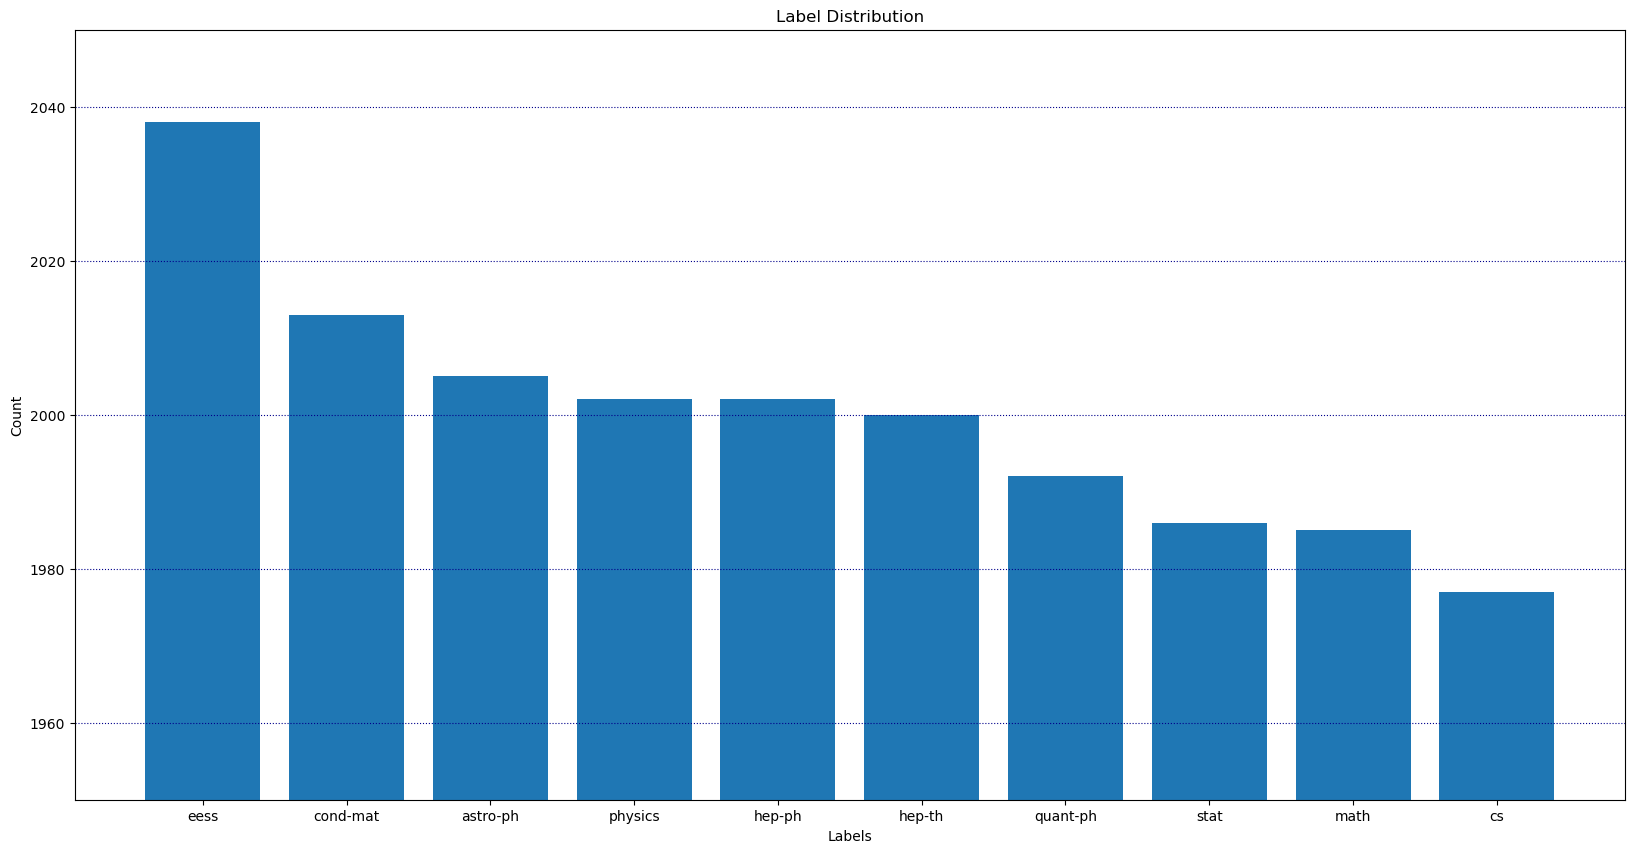

In [73]:
# Plot the distribution of labels
_ = plt.subplots(1, figsize = [20, 10])
label_counts = labelled['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.ylim([1950, 2050])
plt.grid(axis = 'y', color = 'darkblue', linestyle=':')
plt.show()

In [7]:
texts = labelled.abstract.copy()
labels= labelled.label.copy()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels,
                                                   test_size = 0.2,
                                                   random_state = 42)




In [6]:
X_test.shape

(4000, 53405)

In [75]:
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

In [76]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [8]:
path = '//Users//matt//Desktop//comp6721//Project//'

In [15]:
path = '//Users//matt//Desktop//comp6721//Project//'
model_name = 'tf.pkl'

save_model(model = vectorizer,
           filename = path+model_name)


# KNearestNeighbor

In [ ]:
def objective(trial):

    # Define the hyperparameters to optimize
    n_neighbors = trial.suggest_int("n_neighbors", 1, 100)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    p = trial.suggest_categorical("p", [1, 2])

     # Create a k-nearest neighbors classifier with the sampled hyperparameters
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the validation set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score
    Accuracy = accuracy(y_test, y_pred)

    return Accuracy

def optimize_hyperparameters():
    # Create a study object and specify the optimization direction
    study = optuna.create_study(direction="maximize")

    # Optimize the objective function
    study.optimize(objective, n_trials=30, n_jobs = -1)

    # Print the best hyperparameters and the corresponding accuracy
    print("Best hyperparameters: ", study.best_params)
    print("Best accuracy: ", study.best_value)

# Run the optimization
optimize_hyperparameters()

[I 2023-06-15 14:06:17,108] A new study created in memory with name: no-name-7ef4e2c6-f952-4df8-a69b-e30279a18ccb
[I 2023-06-15 14:06:52,759] Trial 3 finished with value: 0.0975 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.0975.
[I 2023-06-15 14:06:53,336] Trial 4 finished with value: 0.0975 and parameters: {'n_neighbors': 63, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.0975.
[I 2023-06-15 14:06:54,166] Trial 8 finished with value: 0.0975 and parameters: {'n_neighbors': 89, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.0975.
[I 2023-06-15 14:06:54,309] Trial 2 finished with value: 0.0975 and parameters: {'n_neighbors': 53, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.0975.
[I 2023-06-15 14:06:54,558] Trial 5 finished with value: 0.0975 and parameters: {'n_neighbors': 24, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.0975.
[I 2023-06-15 14:06:54,650] Trial 0 finished with

Best hyperparameters:  {'n_neighbors': 56, 'weights': 'distance', 'p': 2}
Best accuracy:  0.75725


In [77]:
knnmodel = KNeighborsClassifier(n_neighbors= 56,
                               weights= 'distance',
                               p = 2,
                               n_jobs= -1)

knnmodel.fit(X_train, y_train)

pred_train = knnmodel.predict(X_train)
pred_test  = knnmodel.predict(X_test)



In [78]:
pred_train = knnmodel.predict(X_train)
pred_test  = knnmodel.predict(X_test)

In [18]:
# Calculate metrics for training data
accuracy_train = accuracy(y_train, pred_train)*100
precision_train = precision(y_train, pred_train, average='weighted')*100
recall_train = recall(y_train, pred_train, average='weighted')*100
f1_train = F1(y_train, pred_train, average='weighted')*100

# Calculate metrics for testing data
accuracy_test = accuracy(y_test, pred_test)*100
precision_test = precision(y_test, pred_test, average='weighted')*100
recall_test = recall(y_test, pred_test, average='weighted')*100
f1_test = F1(y_test, pred_test, average='weighted')*100

In [19]:
# Print metrics in formatted lines
print('\033[1m METRICS FOR KNearestNeighbor\n\n')
print(" \033[1mTraining: \033[0m")
print(f"Accuracy:  {accuracy_train:.2f}  Recall:  {recall_train:.2f}  Precision:  {precision_train:.2f}  F1:  {f1_train:.2f}\n")
print(" \033[1mTesting : \033[0m")
print(f"Accuracy:  {accuracy_test:.2f}  Recall:  {recall_test:.2f}  Precision:  {precision_test:.2f}  F1:  {f1_test:.2f}\n")

 METRICS FOR KNearestNeighbor


 Training: 
Accuracy:  100.00  Recall:  100.00  Precision:  100.00  F1:  100.00

 Testing : 
Accuracy:  75.72  Recall:  75.72  Precision:  76.79  F1:  74.79



In [20]:
#saving the model
model_name = 'knn.pkl'
save_model(knnmodel,
          path+model_name)

# RandomForest Classifier

In [ ]:
def objective(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, step=10)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Create the RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict the labels for the validation set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score
    Accuracy = accuracy(y_test, y_pred)

    return Accuracy

def optimize_hyperparameters():
    # Create a study object and specify the optimization direction
    study = optuna.create_study(direction="maximize")

    # Optimize the objective function
    study.optimize(objective, n_trials=30, n_jobs = -1)

    # Print the best hyperparameters and the corresponding accuracy
    print("Best hyperparameters: ", study.best_params)
    print("Best accuracy: ", study.best_value)

# Run the optimization
optimize_hyperparameters()

[I 2023-06-15 14:37:00,110] A new study created in memory with name: no-name-1ff8c3a0-2a33-435a-878b-86cab47ae68a
[I 2023-06-15 14:37:10,115] Trial 10 finished with value: 0.69125 and parameters: {'n_estimators': 170, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.69125.
[W 2023-06-15 14:37:13,751] Trial 10 failed with parameters: {'n_estimators': 830, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2} because of the following error: NameError("name 'X_val' is not defined").
Traceback (most recent call last):
  File "C:\Users\AS19030\AppData\Local\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\AS19030\AppData\Local\Temp\ipykernel_2972\130771708.py", line 21, in objective
    y_pred = clf.predict(X_val)
NameError: name 'X_val' is not defined
[W 2023-06-15 14:37:13,754] Trial 10 failed with value None.
[I 2023-06-15 14:37:18,914] Trial 3 finish

Best hyperparameters:  {'n_estimators': 650, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best accuracy:  0.7455


In [21]:
RFmodel = RandomForestClassifier(n_estimators= 650,
                                  max_depth= 15,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  n_jobs = -1,
                                  random_state = 42)

RFmodel.fit(X_train, y_train)

pred_train = RFmodel.predict(X_train)
pred_test  = RFmodel.predict(X_test)



In [22]:
# Calculate metrics for training data
accuracy_train = accuracy(y_train, pred_train)*100
precision_train = precision(y_train, pred_train, average='weighted')*100
recall_train = recall(y_train, pred_train, average='weighted')*100
f1_train = F1(y_train, pred_train, average='weighted')*100

# Calculate metrics for testing data
accuracy_test = accuracy(y_test, pred_test)*100
precision_test = precision(y_test, pred_test, average='weighted')*100
recall_test = recall(y_test, pred_test, average='weighted')*100
f1_test = F1(y_test, pred_test, average='weighted')*100

In [23]:
# Print metrics in formatted lines
print('\033[1m METRICS FOR RandomForestClassifier\n\n')
print(" \033[1mTraining: \033[0m")
print(f"Accuracy:  {accuracy_train:.2f}  Recall:  {recall_train:.2f}  Precision:  {precision_train:.2f}  F1:  {f1_train:.2f}\n")
print(" \033[1mTesting : \033[0m")
print(f"Accuracy:  {accuracy_test:.2f}  Recall:  {recall_test:.2f}  Precision:  {precision_test:.2f}  F1:  {f1_test:.2f}\n")

 METRICS FOR RandomForestClassifier


 Training: 
Accuracy:  89.05  Recall:  89.05  Precision:  90.00  F1:  89.04

 Testing : 
Accuracy:  74.52  Recall:  74.52  Precision:  75.83  F1:  73.17



In [24]:
model_name = 'RF.pkl'
save_model(RFmodel,
          path+model_name)

# MultiLayer Perceptron Classifier

In [ ]:
# Define the objective function to be optimized by Optuna
def objective(trial):
    # Define the hyperparameters to be optimized
    hidden_size = trial.suggest_int("hidden_size", 32, 128)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)

    # Define the MLPClassifier model
    model = MLPClassifier(hidden_layer_sizes=(hidden_size,), learning_rate_init=learning_rate)

    # Train the model
    model.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    Accuracy = accuracy(y_test, y_pred)

    return Accuracy

In [ ]:
# Define the study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, n_jobs = -1)



# Get the best hyperparameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_accuracy)

[I 2023-06-15 19:05:08,377] A new study created in memory with name: no-name-9b32e207-a627-490f-aee2-0c9d67ae5225
[I 2023-06-15 19:37:42,376] Trial 10 finished with value: 0.8065 and parameters: {'hidden_size': 44, 'learning_rate': 0.006941716289657093}. Best is trial 10 with value: 0.8065.
[I 2023-06-15 19:37:53,942] Trial 5 finished with value: 0.8115 and parameters: {'hidden_size': 42, 'learning_rate': 0.00287655369375992}. Best is trial 5 with value: 0.8115.
[I 2023-06-15 19:42:17,513] Trial 4 finished with value: 0.78175 and parameters: {'hidden_size': 105, 'learning_rate': 0.014092840495124846}. Best is trial 5 with value: 0.8115.
[I 2023-06-15 19:46:13,560] Trial 1 finished with value: 0.77175 and parameters: {'hidden_size': 122, 'learning_rate': 0.012099152921170855}. Best is trial 5 with value: 0.8115.
[I 2023-06-15 19:49:49,368] Trial 7 finished with value: 0.811 and parameters: {'hidden_size': 69, 'learning_rate': 0.0017414854882776114}. Best is trial 5 with value: 0.8115.
[

Best hyperparameters: {'hidden_size': 99, 'learning_rate': 2.0621481141082015e-05}
Best accuracy: 0.828


In [25]:
MLPmodel = MLPClassifier(hidden_layer_sizes = 29,
                         learning_rate_init =2.0621481141082015e-05
                        )

In [26]:
MLPmodel.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=29, learning_rate_init=2.0621481141082015e-05)

In [27]:
pred_train = MLPmodel.predict(X_train)
pred_test = MLPmodel.predict(X_test)

In [28]:
# Calculate metrics for training data
accuracy_train = accuracy(y_train, pred_train)*100
precision_train = precision(y_train, pred_train, average='weighted')*100
recall_train = recall(y_train, pred_train, average='weighted')*100
f1_train = F1(y_train, pred_train, average='weighted')*100

# Calculate metrics for testing data
accuracy_test = accuracy(y_test, pred_test)*100
precision_test = precision(y_test, pred_test, average='weighted')*100
recall_test = recall(y_test, pred_test, average='weighted')*100
f1_test = F1(y_test, pred_test, average='weighted')*100

In [29]:
# Print metrics in formatted lines
print('\033[1m METRICS FOR RandomForestClassifier\n\n')
print(" \033[1mTraining: \033[0m")
print(f"Accuracy:  {accuracy_train:.2f}  Recall:  {recall_train:.2f}  Precision:  {precision_train:.2f}  F1:  {f1_train:.2f}\n")
print(" \033[1mTesting : \033[0m")
print(f"Accuracy:  {accuracy_test:.2f}  Recall:  {recall_test:.2f}  Precision:  {precision_test:.2f}  F1:  {f1_test:.2f}\n")

 METRICS FOR RandomForestClassifier


 Training: 
Accuracy:  91.08  Recall:  91.08  Precision:  91.15  F1:  91.06

 Testing : 
Accuracy:  81.40  Recall:  81.40  Precision:  81.50  F1:  81.30



In [ ]:
model_name = 'MLP.pkl'
save_model(MLPmodel,
          path+model_name)

In [11]:
# load models
#load vectorizer model
model_name = "tf.pkl"
with open(path + model_name, 'rb') as file:
    tf = pickle.load(file)

#load KNN model
model_name = "KNN.pkl"
with open(path + model_name, 'rb') as file:
    knnmodel = pickle.load(file)


model_name = "RF.pkl"
with open(path + model_name, 'rb') as file:
    RF = pickle.load(file)

model_name = "MLP.pkl"
with open(path + model_name, 'rb') as file:
    MLP = pickle.load(file)


In [12]:
@labeling_function()
def knn_labeling(data_point):

    X = data_point["abstract"]
    X = [X]


    X = tf.transform(X)

    # calculating the accuracy of the trained model!
    pred = knnmodel.predict(X)
    
            
    return Labels(pred)

In [13]:
@labeling_function()
def RF_labeling(data_point):

    X = data_point["abstract"]
    X = [X]

    
    X = tf.transform(X)

    # calculating the accuracy of the trained model!
    pred = RF.predict(X)
            
    return Labels(pred)

In [14]:
@labeling_function()
def MLP_labeling(data_point):

    X = data_point["abstract"]
    X = [X]

    X = tf.transform(X)


    # calculating the accuracy of the trained model!
    pred = MLP.predict(X)
            
    return Labels(pred)

In [18]:
abs_train, abs_test, title_train, title_test = train_test_split(labelled.iloc[:, :-1], labelled.iloc[:, -1].to_numpy().reshape(-1,1),
                                                                test_size= 0.2,
                                                                random_state = 42)

In [19]:
# create a list of the labelling functions you have defined
lfs = [MLP_labeling, knn_labeling, RF_labeling]

applier = PandasLFApplier(lfs=lfs)

title_pred = applier.apply(abs_train)

100%|█████████████████████████████████████| 16000/16000 [14:42<00:00, 18.13it/s]


In [20]:
LFAnalysis(L=title_pred, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
MLP_labeling,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.890,0.886375,0.118125
knn_labeling,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.898,0.891375,0.118438
RF_labeling,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.887,0.883250,0.117688


In [21]:
label_model = LabelModel(cardinality=10, 
                         verbose=False)

In [22]:
label_model.fit(L_train=title_pred,
                n_epochs=100_000,
                seed=42)

100%|██████████████████████████████| 100000/100000 [00:15<00:00, 6478.84epoch/s]


In [24]:

title_pred = label_model.predict(L=title_pred)


In [34]:
array = ['physics', 'quant-ph', 'cond-mat', 'stat', 'math', 'hep-th', 'cs', 'hep-ph', 'astro-ph', 'eess']

dictionary = {}

for i, element in enumerate(array, start=1):
    dictionary[i] = element
    
dictionary[-1] = np.NaN

In [39]:
train_pred = np.array([])
for val in title_pred:
    
    train_pred = np.append(train_pred, dictionary[val])


In [40]:
print('training metrics:\n\t\t')

print(f'accuracy : {accuracy(train_pred, title_train)*100:.2f}\nprecision: {precision(train_pred, title_train, average="weighted")*100:.2f}\nrecall   : {precision(train_pred, title_train, average="weighted")*100:.2f}\nF1       : {F1(train_pred, title_train, average="weighted")*100:.2f}\n' )

training metrics:
		
accuracy : 86.48
precision: 87.48
recall   : 87.48
F1       : 86.96



In [42]:
title_test_pred = applier.apply(abs_test)

100%|███████████████████████████████████████| 4000/4000 [03:49<00:00, 17.40it/s]


In [43]:
LFAnalysis(L=title_test_pred, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
MLP_labeling,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.88450,0.87650,0.22500
knn_labeling,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.88375,0.87375,0.22450
RF_labeling,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.86825,0.85825,0.22125


In [44]:
title_test_pred = label_model.predict(L=title_test_pred)


In [51]:
test_pred = np.array([])
for val in title_test_pred:
    
    test_pred = np.append(test_pred, dictionary[val])

In [53]:
print('test metrics:\n\t\t')

print(f'accuracy : {accuracy(test_pred, title_test)*100:.2f}\nprecision: {precision(test_pred, title_test, average="weighted")*100:.2f}\nrecall   : {precision(test_pred, title_test, average="weighted")*100:.2f}\nF1       : {F1(test_pred, title_test, average="weighted")*100:.2f}\n' )

test metrics:
		
accuracy : 72.47
precision: 74.88
recall   : 74.88
F1       : 73.39



In [93]:
pred_label_test = applier.apply(unlabelled)

100%|███████████████████████████████████| 80000/80000 [1:16:45<00:00, 17.37it/s]


In [95]:
from snorkel.labeling.model.baselines import MajorityLabelVoter

num_classes = 10

majority_model = MajorityLabelVoter(cardinality=num_classes)

In [96]:
y_preds = majority_model.predict_proba(L=pred_label_test)

In [97]:
preds_test_label = label_model.predict(L=pred_label_test)

In [98]:
array = ['physics', 'quant-ph', 'cond-mat', 'stat', 'math', 'hep-th', 'cs', 'hep-ph', 'astro-ph', 'eess']

dictionary = {}

for i, element in enumerate(array, start=1):
    dictionary[i] = element

In [99]:
pred_labels = pd.Series(preds_test_label).map(dictionary)

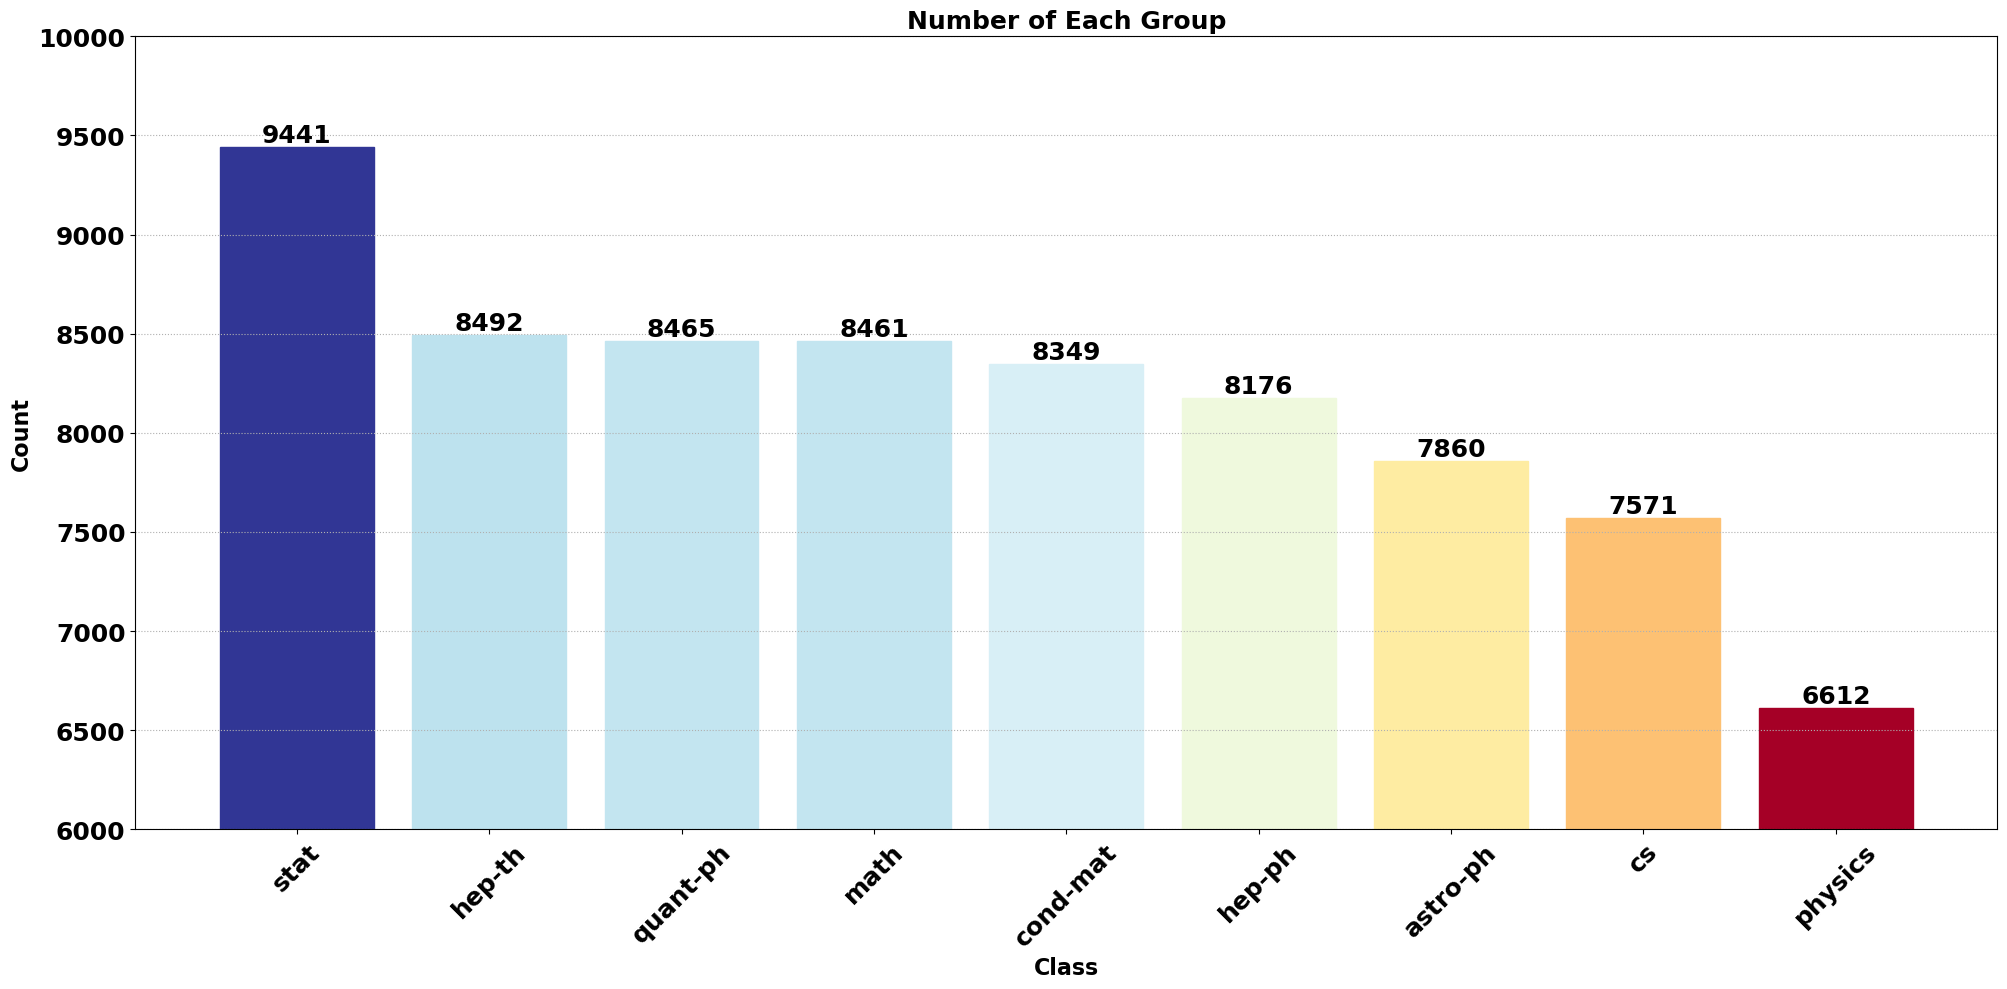

In [466]:
array = ['physics', 'quant-ph', 'cond-mat', 'stat', 'math', 'hep-th', 'cs', 'hep-ph', 'astro-ph', 'eess']

# Count the values in pred_labels
label_counts = pred_labels.value_counts()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(label_counts.index, label_counts.values)

# Color the bars based on their values
color_map = plt.cm.get_cmap('RdYlBu')
normalized_values = (label_counts.values - label_counts.values.min()) / (label_counts.values.max() - label_counts.values.min())
for bar, value in zip(bars, normalized_values):
    bar.set_color(color_map(value))

# Adding labels to each bar
for i, label in enumerate(label_counts.index):
    count = label_counts[label]
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=18, fontweight='bold')

# Formatting the plot
plt.xticks(rotation=45, fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.xlabel('Class', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of Each Group', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.ylim([6000, 10_000])
plt.grid(axis = 'y', linestyle=":")
# Display the plot
plt.show()


/var/folders/km/ljsg37kd1hq2f0mfrymm9wp40000gn/T/ipykernel_7628/1649715085.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(metrics, fontsize=10,fontname='times new roman')


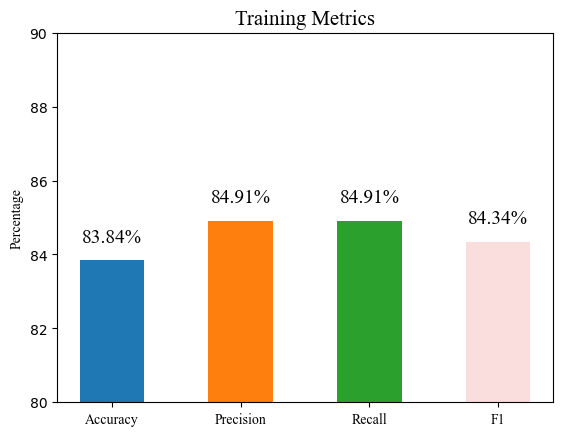

In [33]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [83.84, 84.91, 84.91, 84.34]

fig, ax = plt.subplots()
ax.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#fadede'], width = 0.5)

ax.set_ylim([0, 100])
ax.set_ylabel('Percentage', fontname='times new roman', fontsize=10)
ax.set_title('Training Metrics', fontname='times new roman', fontsize=15)
ax.set_xticklabels(metrics, fontsize=10,fontname='times new roman')
# ax.set_yticklabels('', fontsize=10)
# Adding data labels to the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v)+'%', ha='center',fontsize=14, fontname='times new roman')
plt.ylim([80, 90])
plt.show()


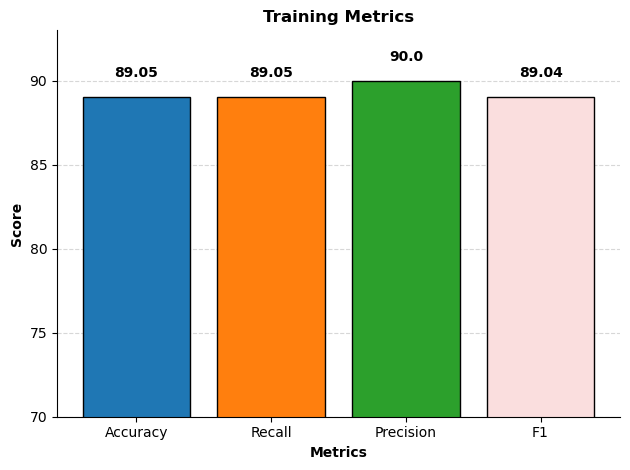

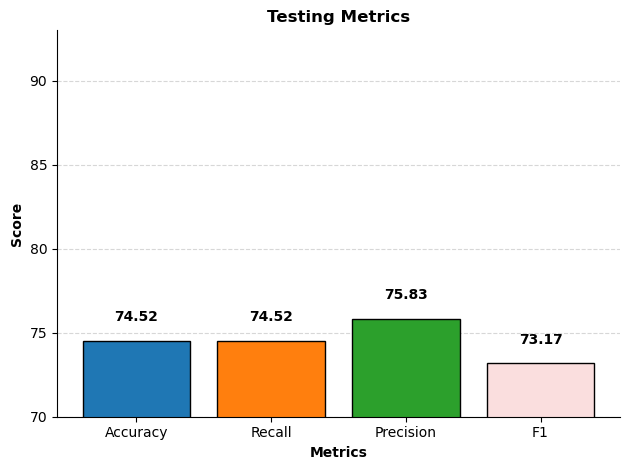

In [68]:
import matplotlib.pyplot as plt

# Define the metrics values
training_metrics = {
    'Accuracy': 89.05,
    'Recall': 89.05,
    'Precision': 90.00,
    'F1': 89.04
}

testing_metrics = {
    'Accuracy': 74.52,
    'Recall': 74.52,
    'Precision': 75.83,
    'F1': 73.17
}

# Create a function to plot the metrics
def plot_metrics(metrics, title):
    # Extract metric names and values
    names = list(metrics.keys())
    values = list(metrics.values())

    # Set up the figure and axes
    fig, ax = plt.subplots()
    ax.bar(names, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#fadede'], edgecolor='black')

    # Add some extra styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='dashed', alpha=0.5)
    ax.set_axisbelow(True)

    # Add the values to each bar
    for i, v in enumerate(values):
        ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

    # Set labels and title
    ax.set_xlabel('Metrics', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title(title, fontweight='bold')

    # Set the y-axis limits
    ax.set_ylim([70, 93])

    # Adjust the layout
    plt.tight_layout()

    # Display the plot
    plt.show()

# Plot the training metrics
plot_metrics(training_metrics, 'Training Metrics')

# Plot the testing metrics
plot_metrics(testing_metrics, 'Testing Metrics')


In [57]:
from tabulate import tabulate

# Define the data for the table
data = [
    ['MLP_labeling', 0.88890, 0.88440, 0.13950],
    ['knn_labeling', 0.89515, 0.88785, 0.13965],
    ['RF_labeling', 0.88325, 0.87825, 0.13840]
]

# Define the table headers
headers = ['      - ', 'Coverage', 'Overlaps', 'Conflicts']

# Generate the table
table = tabulate(data, headers, tablefmt='fancy_grid')

# Display the table
print(table)


╒══════════════╤════════════╤════════════╤═════════════╕
│       -      │   Coverage │   Overlaps │   Conflicts │
╞══════════════╪════════════╪════════════╪═════════════╡
│ MLP_labeling │    0.8889  │    0.8844  │     0.1395  │
├──────────────┼────────────┼────────────┼─────────────┤
│ knn_labeling │    0.89515 │    0.88785 │     0.13965 │
├──────────────┼────────────┼────────────┼─────────────┤
│ RF_labeling  │    0.88325 │    0.87825 │     0.1384  │
╘══════════════╧════════════╧════════════╧═════════════╛


In [60]:
from tabulate import tabulate

# Define the data
data = [
    ['-', 'Weak label generation', 'labeling'],
    ['Labelled data', '18:40', '00:14'],
    ['Unlabelled data', '74:51', '1:00']
]

# Define the table headers
headers = ['', 'Weak label generation', 'labeling']

# Generate the table with center alignment
table = tabulate(data, headers, tablefmt='fancy_grid', stralign='center')

# Display the table
print(table)


╒═════════════════╤═════════════════════════╤════════════╕
│                 │  Weak label generation  │  labeling  │
╞═════════════════╪═════════════════════════╪════════════╡
│        -        │  Weak label generation  │  labeling  │
├─────────────────┼─────────────────────────┼────────────┤
│  Labelled data  │          18:40          │   00:14    │
├─────────────────┼─────────────────────────┼────────────┤
│ Unlabelled data │          74:51          │    1:00    │
╘═════════════════╧═════════════════════════╧════════════╛
